파일명 : python_ts_241121.ipynb

소스코드 참조 : 시계열강의_입문.ipynb

# 한글 폰트 설치

In [43]:
# 한글 폰트 실행
from matplotlib import rcParams
from matplotlib import font_manager,rc
rcParams['axes.unicode_minus']=False
plt.rcParams['font.family']='NanumGothic'
font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/NanumGothic.ttf').get_name()
rc('font',family=font_name)

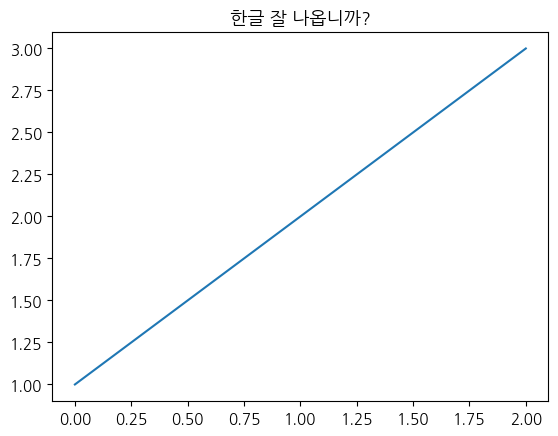

In [44]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

# 라이브러리

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 파이썬 시계열 기본 라이브러리
from statsmodels.tsa.seasonal import seasonal_decompose, STL

# 데이버 불러오기

In [46]:
DATA_PATH = 'c:/Archiving/IMDGB/step09_ts/dataset/'

df = pd.read_csv(DATA_PATH + 'jj.csv')
df.head()

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    84 non-null     object 
 1   data    84 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.4+ KB


In [48]:
df.tail()

,date,data
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02
83,1980-10-01,11.61


# 데이터 시각화

In [49]:
df['year'] = pd.DatetimeIndex(df['date']).year
df

,date,data,year
0,1960-01-01,0.71,1960
1,1960-04-01,0.63,1960
2,1960-07-02,0.85,1960
3,1960-10-01,0.44,1960
4,1961-01-01,0.61,1961
...,...,...,...
79,1979-10-01,9.99,1979
80,1980-01-01,16.20,1980
81,1980-04-01,14.67,1980
82,1980-07-02,16.02,1980


# 시각화

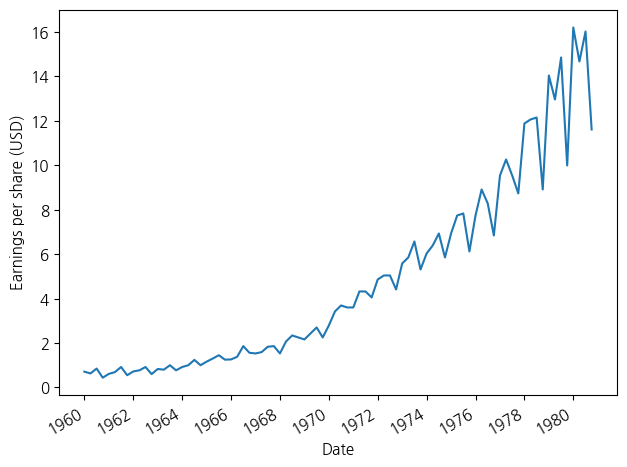

In [50]:
fig, ax = plt.subplots()

ax.plot(df.date, df.data)
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

## 시계열 분해 및 시각화
- 메서드 참고 : https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.STL.html

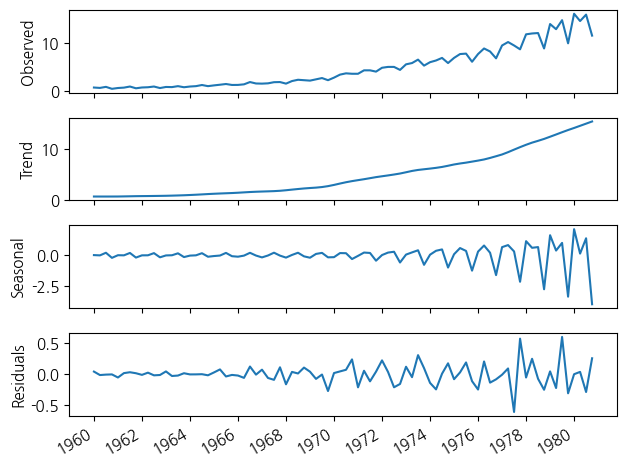

In [51]:
advanced_decomposition = STL(df.data, period=4).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()
plt.show()

# 데이터 복원

In [52]:
df = df.drop('year', axis=1)
df

,date,data
0,1960-01-01,0.71
1,1960-04-01,0.63
2,1960-07-02,0.85
3,1960-10-01,0.44
4,1961-01-01,0.61
...,...,...
79,1979-10-01,9.99
80,1980-01-01,16.20
81,1980-04-01,14.67
82,1980-07-02,16.02


# 베이스라인 모델 설계
- 훈련데이터 : 1960년 ~ 1979년
- 예측데이터 : 1980년

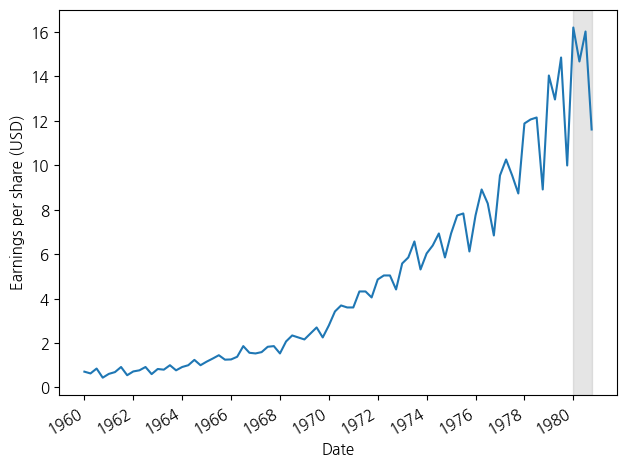

In [53]:
fig, ax = plt.subplots()

ax.plot(df['date'], df['data'])
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)

plt.xticks(np.arange(0, 81, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

# 평가지표 만들기
- MAPE 함수 만들기

In [54]:
from sklearn.metrics import mean_absolute_percentage_error

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# 모델 1

## 데이터셋 분리
- 훈련 데이터 : 1960~1979
- 테스트 데이터 : 1980

In [55]:
train = df[:-4]
test = df[-4:]

In [56]:
train.head(1)

,date,data
0,1960-01-01,0.71


In [57]:
test.head(1)

,date,data
80,1980-01-01,16.2


## 모델 학습

In [58]:
historical_mean = np.mean(train['data'])
test.loc[:, 'pred_mean'] = historical_mean
test

C:\Users\chaer\AppData\Local\Temp\ipykernel_4844\745061416.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_mean'] = historical_mean


,date,data,pred_mean
80,1980-01-01,16.20,4.3085
81,1980-04-01,14.67,4.3085
82,1980-07-02,16.02,4.3085
83,1980-10-01,11.61,4.3085


## 모델평가

In [59]:
mape_hist_mean = mape(test['data'], test['pred_mean']) # 70% 차이 발생
mape_hist_mean

np.float64(70.00752579965119)

In [60]:
mean_absolute_percentage_error(test['data'], test['pred_mean']) * 100

np.float64(70.00752579965119)

## 모델 시각화

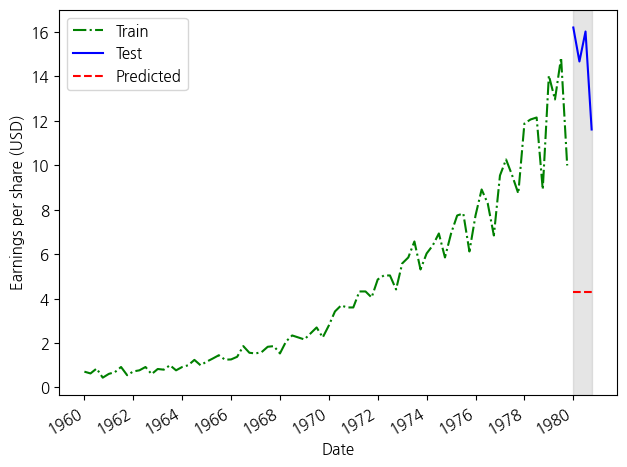

In [61]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

# 모델 2

In [62]:
last_year_mean = np.mean(train['data'][-4:])
test.loc[:, 'pred_last_yr_mean'] = last_year_mean
mean_absolute_percentage_error(test['data'], test['pred_last_yr_mean']) * 100

C:\Users\chaer\AppData\Local\Temp\ipykernel_4844\903594304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'pred_last_yr_mean'] = last_year_mean


np.float64(15.5963680725103)

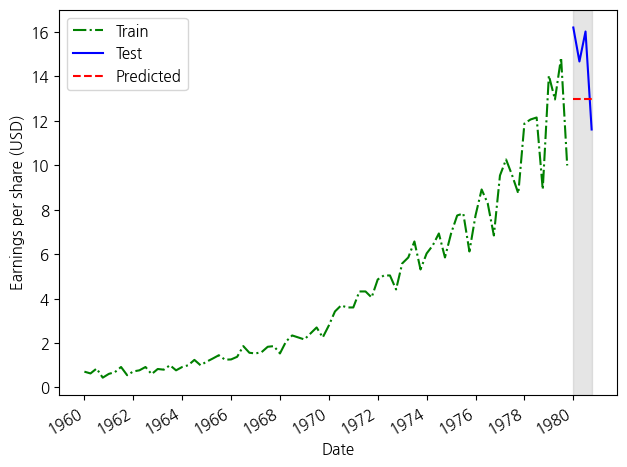

In [63]:
fig, ax = plt.subplots()

ax.plot(train['date'], train['data'], 'g-.', label='Train')
ax.plot(test['date'], test['data'], 'b-', label='Test')
ax.plot(test['date'], test['pred_last_yr_mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Earnings per share (USD)')
ax.axvspan(80, 83, color='#808080', alpha=0.2)
ax.legend(loc=2)

plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

# 모델 1과 모델 2 비교

NameError: name 'mape_last_year_mean' is not defined

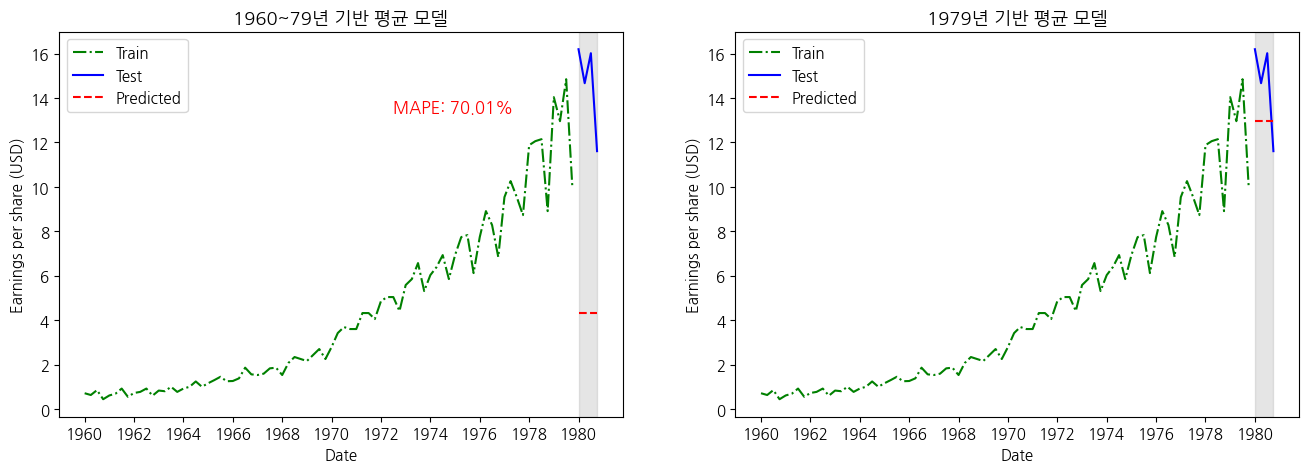

In [67]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 5))

# Plot for 1960~79 mean model
ax[0].plot(train['date'], train['data'], 'g-.', label='Train')
ax[0].plot(test['date'], test['data'], 'b-', label='Test')
ax[0].plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax[0].set_title('1960~79년 기반 평균 모델')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Earnings per share (USD)')
ax[0].axvspan(80, 83, color='#808080', alpha=0.2)
ax[0].legend(loc=2)
ax[0].set_xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
ax[0].text(50, max(train['data']) * 0.9, f"MAPE: {round(mape_hist_mean, 2)}%", color='red', fontsize=12)

# Plot for 1979 mean model
ax[1].plot(train['date'], train['data'], 'g-.', label='Train')
ax[1].plot(test['date'], test['data'], 'b-', label='Test')
ax[1].plot(test['date'], test['pred_last_yr_mean'], 'r--', label='Predicted')
ax[1].set_title('1979년 기반 평균 모델')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Earnings per share (USD)')
ax[1].axvspan(80, 83, color='#808080', alpha=0.2)
ax[1].legend(loc=2)
ax[1].set_xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
ax[1].text(50, max(train['data']) * 0.9, f"MAPE: {round(mape_last_year_mean, 2)}%", color='red', fontsize=12)

# Format date labels and save the figure
fig.autofmt_xdate()
plt.tight_layout()
#plt.savefig('earnings_per_share_forecast.png')  # Save the figure
plt.show()

# 계절적 예측 구현
- 마지막으로 측정된 주기가 미래에도 반복되지 않을까?
- 1979년 데이터를 그대로 1980년에 대입
> 계절성이 있는 경우 냅다 평균이 아니라 주기를 반영해서 하면 더 성능이 좋다

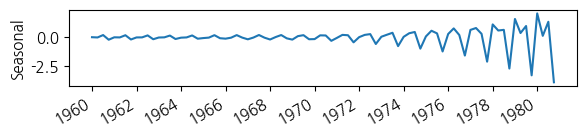

In [74]:
fig, ax = plt.subplots(figsize=(6, 1.5))

ax.plot(advanced_decomposition.seasonal)
ax.set_ylabel('Seasonal')
plt.xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

In [75]:
train['data'][-4:].values

array([14.04, 12.96, 14.85,  9.99])

In [76]:
test.loc[:, 'pred_last_season'] = train['data'][-4:].values
mape_naive_seasonal = mape(test['data'], test['pred_last_season'])
mape_naive_seasonal

np.float64(11.561658552433654)

NameError: name 'mape_last_year_mean' is not defined

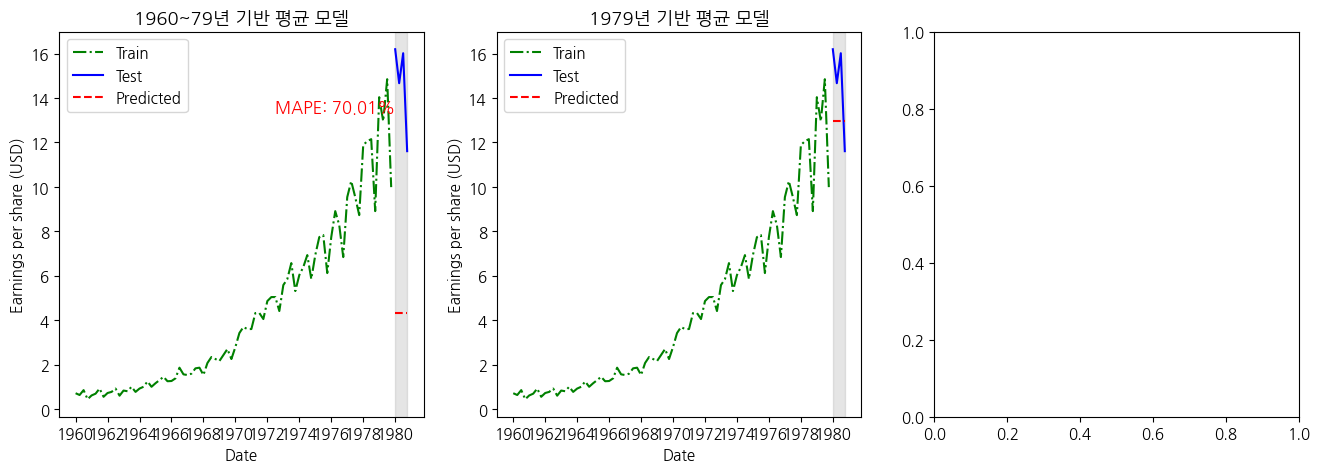

In [77]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 5))

# Plot for 1960~79 mean model
ax[0].plot(train['date'], train['data'], 'g-.', label='Train')
ax[0].plot(test['date'], test['data'], 'b-', label='Test')
ax[0].plot(test['date'], test['pred_mean'], 'r--', label='Predicted')
ax[0].set_title('1960~79년 기반 평균 모델')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Earnings per share (USD)')
ax[0].axvspan(80, 83, color='#808080', alpha=0.2)
ax[0].legend(loc=2)
ax[0].set_xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
ax[0].text(50, max(train['data']) * 0.9, f"MAPE: {round(mape_hist_mean, 2)}%", color='red', fontsize=12)

# Plot for 1979 mean model
ax[1].plot(train['date'], train['data'], 'g-.', label='Train')
ax[1].plot(test['date'], test['data'], 'b-', label='Test')
ax[1].plot(test['date'], test['pred_last_yr_mean'], 'r--', label='Predicted')
ax[1].set_title('1979년 기반 평균 모델')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Earnings per share (USD)')
ax[1].axvspan(80, 83, color='#808080', alpha=0.2)
ax[1].legend(loc=2)
ax[1].set_xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
ax[1].text(50, max(train['data']) * 0.9, f"MAPE: {round(mape_last_year_mean, 2)}%", color='red', fontsize=12)

# Plot for 1979 mean model
ax[2].plot(train['date'], train['data'], 'g-.', label='Train')
ax[2].plot(test['date'], test['data'], 'b-', label='Test')
ax[2].plot(test['date'], test['pred_last_season'], 'r--', label='Predicted')
ax[2].set_title('계절적 요인 적용 모델')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Earnings per share (USD)')
ax[2].axvspan(80, 83, color='#808080', alpha=0.2)
ax[2].legend(loc=2)
ax[2].set_xticks(np.arange(0, 85, 8), [1960, 1962, 1964, 1966, 1968, 1970, 1972, 1974, 1976, 1978, 1980])
ax[2].text(50, max(train['data']) * 0.9, f"MAPE: {round(mape_naive_seasonal, 2)}%", color='red', fontsize=12)

# Format date labels and save the figure
fig.autofmt_xdate()
plt.tight_layout()
plt.savefig('earnings_per_share_forecast.png')  # Save the figure
plt.show()

## 모델 성능 비교

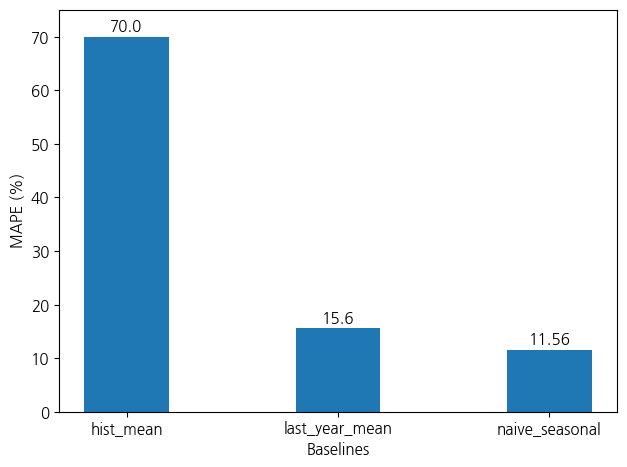

In [78]:
fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'naive_seasonal']
y = [70.00, 15.60, 11.56]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

# 확률보행
- 참조 시계열강의_입문

In [79]:
DATA_PATH = 'c:/Archiving/IMDGB/step09_ts/dataset/'

df = pd.read_csv(DATA_PATH + 'GOOGL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
1,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
2,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900
3,2020-04-30,1331.359985,1350.000000,1321.500000,1346.699951,1346.699951,2792100
4,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600


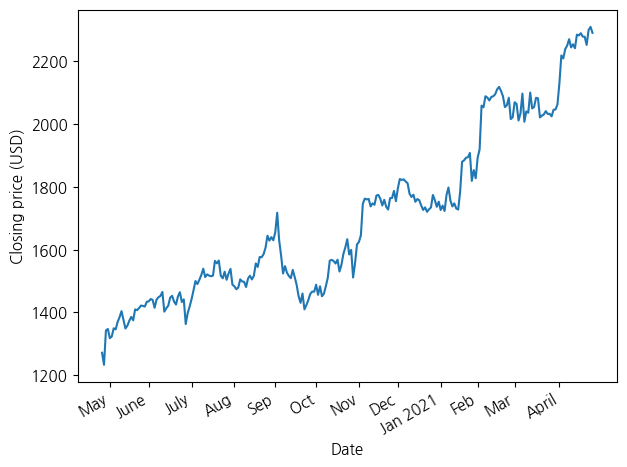

In [80]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [4, 24, 46, 68, 89, 110, 132, 152, 174, 193, 212, 235],
    ['May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan 2021', 'Feb', 'Mar', 'April'])

fig.autofmt_xdate()
plt.tight_layout()

plt.show()

## 정상성 테스트 시각화
- 나중에 시뮬레이션 할 때 참조
- 시뮬레이션 데이터를 만드는 거

In [81]:
def simulate_process(is_stationary: bool) -> np.array: # return 값 array로 빼라
    np.random.seed(42)
    process = np.empty(400)

    if is_stationary:
        alpha = 0.5
        process[0] = 0
    else:
        alpha = 1
        process[0] = 10

    for i in range(400):
        if i+1 < 400:
            process[i+1] = alpha*process[i] + np.random.standard_normal()
        else:
            break

    return process

In [89]:

    """
    정상이거나 비정상적인 확률 과정을 시뮬레이션합니다.

    매개변수:
        is_stationary (bool): 
            - True일 경우, 정상적인 확률 과정을 생성합니다. 이때, 데이터의 크기가 제한됩니다.
            - False일 경우, 비정상적인 확률 과정을 생성합니다. 이때, 데이터의 크기가 무한히 증가할 수 있습니다.

    반환값:
        np.array: 
            길이가 400인 NumPy 배열로, 시뮬레이션된 확률 과정을 나타냅니다.

    참고:
        - 과정은 다음의 점화식을 사용하여 생성됩니다:
          process[i+1] = alpha * process[i] + noise
          여기서 `alpha`는 `is_stationary` 매개변수에 따라 결정됩니다.
        - is_stationary가 True일 경우:
            - alpha = 0.5로 설정되며, 초기 값은 0입니다.
        - is_stationary가 False일 경우:
            - alpha = 1로 설정되며, 초기 값은 10입니다.
        - `noise`는 표준 정규분포에서 샘플링된 난수입니다.

    """


'\n정상이거나 비정상적인 확률 과정을 시뮬레이션합니다.\n\n매개변수:\n    is_stationary (bool): \n        - True일 경우, 정상적인 확률 과정을 생성합니다. 이때, 데이터의 크기가 제한됩니다.\n        - False일 경우, 비정상적인 확률 과정을 생성합니다. 이때, 데이터의 크기가 무한히 증가할 수 있습니다.\n\n반환값:\n    np.array: \n        길이가 400인 NumPy 배열로, 시뮬레이션된 확률 과정을 나타냅니다.\n\n참고:\n    - 과정은 다음의 점화식을 사용하여 생성됩니다:\n      process[i+1] = alpha * process[i] + noise\n      여기서 `alpha`는 `is_stationary` 매개변수에 따라 결정됩니다.\n    - is_stationary가 True일 경우:\n        - alpha = 0.5로 설정되며, 초기 값은 0입니다.\n    - is_stationary가 False일 경우:\n        - alpha = 1로 설정되며, 초기 값은 10입니다.\n    - `noise`는 표준 정규분포에서 샘플링된 난수입니다.\n\n'

In [83]:
stationary = simulate_process(True)
non_stationary = simulate_process(False)

In [84]:
stationary # 정상성 만족하는 데이터 만들어짐

array([ 0.00000000e+00,  4.96714153e-01,  1.10092775e-01,  7.02734926e-01,
        1.87439732e+00,  7.03045285e-01,  1.17385686e-01,  1.63790566e+00,
        1.58638756e+00,  3.23719393e-01,  7.04419740e-01, -1.11207823e-01,
       -5.21333665e-01, -1.87045609e-02, -1.92263253e+00, -2.68623410e+00,
       -1.90540458e+00, -1.96553341e+00, -6.68519372e-01, -1.24228376e+00,
       -2.03344558e+00,  4.48925978e-01, -1.31331154e-03,  6.68715489e-02,
       -1.39131241e+00, -1.24003893e+00, -5.09096875e-01, -1.40554202e+00,
       -3.27072989e-01, -7.64175185e-01, -6.73781342e-01, -9.38597283e-01,
        1.38297954e+00,  6.77992547e-01, -7.18714656e-01,  4.63187584e-01,
       -9.89249858e-01, -2.85761334e-01, -2.10255079e+00, -2.37946144e+00,
       -9.92869486e-01,  2.42031837e-01,  2.92384200e-01,  3.05438174e-02,
       -2.85831787e-01, -1.62143788e+00, -1.53056315e+00, -1.22592035e+00,
        4.44162053e-01,  5.65699316e-01, -1.48019050e+00, -4.16011279e-01,
       -5.93087920e-01, -

In [87]:
non_stationary

array([10.        , 10.49671415, 10.35844985, 11.00613839, 12.52916825,
       12.29501487, 12.06087791, 13.64009073, 14.40752546, 13.93805107,
       14.48061112, 14.01719342, 13.55146367, 13.79342594, 11.8801457 ,
       10.15522787,  9.59294034,  8.58010922,  8.89435655,  7.98633247,
        6.57402877,  8.03967754,  7.81390124,  7.88142944,  6.45668126,
        5.91229853,  6.02322112,  4.87222755,  5.24792556,  4.64728687,
        4.35559312,  3.75388651,  5.6061647 ,  5.59266747,  4.53495654,
        5.35750146,  4.13665781,  4.3455214 ,  2.38585128,  1.05766523,
        1.25452646,  1.99299304,  2.16436132,  2.04871304,  1.74760935,
        0.26908736, -0.45075685, -0.91139562,  0.1457266 ,  0.48934489,
       -1.27369526, -0.94961129, -1.33469357, -2.01161557, -1.39993929,
       -0.36893976,  0.56234036, -0.27687717, -0.58608954, -0.25482611,
        0.72071902,  0.24154478,  0.0558858 , -1.05044917, -2.2466558 ,
       -1.43412997, -0.07788995, -0.14990007,  0.85363283,  1.21

## 정상성의 조건
- 시점에 상관없이 평균이 일정한가?
- 시점에 상관없이 분산이 일정한가?
> 계절성이 있는 데이터
> - 정상성 만족 안함
> - 시점에 상관 있을 테니까.
> - ㅇㅋㅇㅋ



    """
    주어진 확률 과정의 시간에 따른 평균을 계산합니다.

    매개변수:
        process (np.array): 
            - 확률 과정 데이터를 담고 있는 NumPy 배열.
            - 각 값은 시간(t)별 상태를 나타냅니다.

    반환값:
        np.array: 
            - 시간에 따라 누적 평균을 계산한 값들의 리스트.
            - 각 원소는 해당 시점까지의 평균값을 나타냅니다.

    동작 방식:
        - 입력된 `process` 배열의 각 시점 \(i\)에서, 0부터 \(i\)까지의 평균을 계산합니다.
        - 첫 번째 값부터 현재 시점까지의 모든 값을 포함한 평균을 순차적으로 누적 계산합니다.
        - 결과는 각 시간별 평균의 리스트로 반환됩니다.

    예시:
        >>> process = np.array([1, 2, 3, 4])
        >>> mean_over_time(process)
        [1.0, 1.5, 2.0, 2.5]
    """
def var_over_time(process: np.array) -> np.array:
    var_func = []

    for i in range(len(process)):
        var_func.append(np.var(process[:i]))

    return var_func

stationary_var = var_over_time(stationary)
non_stationary_var = var_over_time(non_stationary)

fig, ax = plt.subplots()

ax.plot(stationary_var, label='stationary')
ax.plot(non_stationary_var, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Variance')
ax.legend(loc=2)

plt.tight_layout()
plt.show()

# 아 위에 왜 안돼

In [98]:
# 랜덤워크 시각화

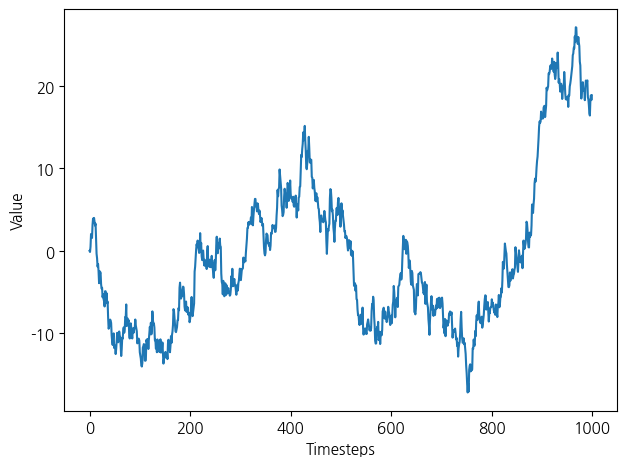

In [97]:
np.random.seed(42)

steps = np.random.standard_normal(1000)
steps[0]=0

random_walk = np.cumsum(steps)

fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

In [110]:
# 요게 비정상성 시계열의 모습

# 정상성 ADF 테스트
- 귀무가설: 시계열은 정상성이 아니다. (비정상성)
- 대립가설: 시계열은 정상성이다.


In [99]:
random_walk

array([  0.        ,  -0.1382643 ,   0.50942424,   2.03245409,
         1.79830072,   1.56416376,   3.14337658,   3.91081131,
         3.44133692,   3.98389696,   3.52047927,   3.05474952,
         3.29671179,   1.38343154,  -0.34148629,  -0.90377382,
        -1.91660494,  -1.6023576 ,  -2.51038168,  -3.92268538,
        -2.45703661,  -2.68281291,  -2.61528471,  -4.04003289,
        -4.58441562,  -4.47349303,  -5.62448661,  -5.24878859,
        -5.84942728,  -6.14112103,  -6.74282764,  -4.89054946,
        -4.90404668,  -5.96175761,  -5.1392127 ,  -6.36005635,
        -6.15119275,  -8.11086288,  -9.43904893,  -9.24218769,
        -8.50372111,  -8.33235283,  -8.44800111,  -8.74910481,
       -10.2276268 , -10.94747101, -11.40810978, -10.35098755,
       -10.00736926, -11.77040942, -11.44632545, -11.83140773,
       -12.50832973, -11.89665344, -10.86565392,  -9.9343738 ,
       -10.77359132, -11.0828037 , -10.75154026,  -9.77599514,
       -10.25516938, -10.44082835, -11.54716333, -12.74

In [100]:
from statsmodels.tsa.stattools import adfuller

ADF_result = adfuller(random_walk)
ADF_result

(np.float64(-0.9659524876918755),
 np.float64(0.7654789696692579),
 0,
 999,
 {'1%': np.float64(-3.4369127451400474),
  '5%': np.float64(-2.864437475834273),
  '10%': np.float64(-2.568312754566378)},
 np.float64(2735.41783678331))

In [101]:
# (-0.9659524876918755): adf 값
# 0.7654789696692579: pvalue 값

In [102]:
# 정상성 만족하지 않는다는 것을 알 수 있다

In [103]:
# 차분을 해서 정상성 만족 시켜야 함

## 차분 적용

In [104]:
diff_random_walk = np.diff(random_walk, n=1)

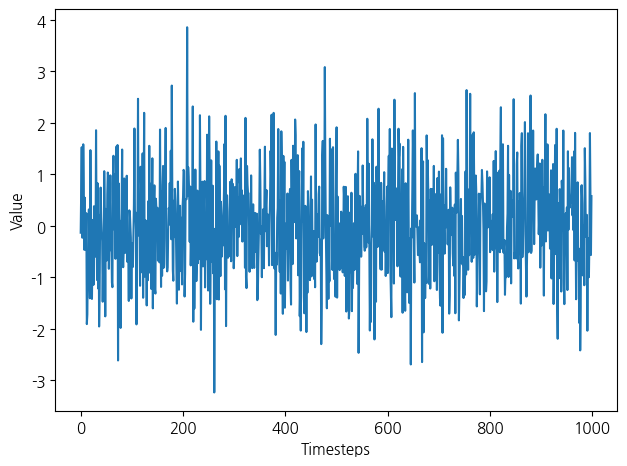

In [105]:
fig, ax = plt.subplots()

ax.plot(diff_random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()
plt.show()

In [109]:
# 요게 정상성 시계열의 모습

In [106]:
ADF_result = adfuller(diff_random_walk)
ADF_result

(np.float64(-31.789310857560594),
 0.0,
 0,
 998,
 {'1%': np.float64(-3.4369193380671),
  '5%': np.float64(-2.864440383452517),
  '10%': np.float64(-2.56831430323573)},
 np.float64(2732.1890358304863))

In [108]:
ADF_result[1]
# 정상성 만족하게 됨

0.0